### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [215]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [216]:
data = pd.read_csv('data/coupons.csv')

In [217]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [218]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [219]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

## Car column
Let's look at the car column as it seems like there is a lot of data missing

In [220]:
car_null = data['car'].isnull().sum() / data.shape[0] *100
print(car_null)
data['car'].value_counts()

99.14853358561967


car
Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: count, dtype: int64

Based on the above information, 99.15% of the data is missing so we can probably drop the car column.

In [221]:
data = data.drop(columns = "car")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

In [222]:
data.isnull().sum()

destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                     107
CoffeeHouse             217
CarryAway               151
RestaurantLessThan20    130
Restaurant20To50        189
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64

## 5 other parameters with Null - let's find the median
Now we have 5 other categories with Null values, but they're not numeric values. We have to find a way
to get the median of those fields and sorting values would not necessarily put them in order that we want.
The order of string would be "1-3", "4-8", "gt8", "less1", "never" but we really want the order to be
"never", "less1", "1-3", "4-8", "gt8"

### Example of wrong order below

ValueError: output array is read-only

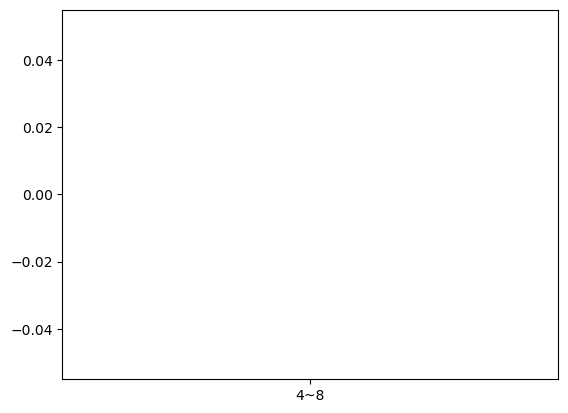

In [223]:
sns.set_palette("deep")
fig1 = sns.histplot(data, x = 'CarryAway')
fig1.set_title('Example of the Carry Away distribution showing wrong order of label')
fig1.set_xlabel('Labels have the wrong order')
plt.savefig('images/wrong_order.png')

So let's define a function that returns the median of a column that has strings in it. For that, we think
to think outside the box a little bit,unless that function already exists and I'm ot advanced enough yet :)

In [224]:
from pandas.api.types import CategoricalDtype
import math

# Let's define the sort order

sort_order = CategoricalDtype(
    ["never", "less1", "1~3", "4~8", "gt8"], 
    ordered=True
)

## Function to find the median in a string

The function below takes a column from a dataframe, drops the NaN, uses the sort_order that we defined previously, sorts
the values in that order. Then it takes the values right in the middle (size of dataset / 2) and return that value

In [225]:
def med_str(str_col):
    temp_df = pd.DataFrame({'visits' : []})
    temp_df2 = pd.DataFrame({'visits' : []})
    temp_df['visits'] = data[str_col]
    temp_df['visits'] = temp_df['visits'].astype(sort_order)
    temp_df2['visits'] = temp_df['visits'].dropna()
    temp_df2 = temp_df2.sort_values('visits')
    median_index = math.trunc(temp_df2.size / 2)
    return temp_df2['visits'].iloc[median_index]

In [226]:
bar_med = med_str('Bar')
print(bar_med)
cof_med = med_str('CoffeeHouse')
print(cof_med)
car_med = med_str('CarryAway')
print(car_med)
res20_med = med_str('RestaurantLessThan20')
print(res20_med)
res50_med = med_str('Restaurant20To50')
print(res50_med)

less1
less1
1~3
1~3
less1


We now have all of our median values that we can apply to each respective columns to remove the NaN

In [227]:
data['Bar'] = data['Bar'].fillna(bar_med)
data['CoffeeHouse'] = data['CoffeeHouse'].fillna(cof_med)
data['CarryAway'] = data['CarryAway'].fillna(car_med)
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].fillna(res20_med)
data['Restaurant20To50'] = data['Restaurant20To50'].fillna(res50_med)
data.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

All right! We have a clean dataset.

4. What proportion of the total observations chose to accept the coupon? 



In [228]:
coupon_ratio = data['Y'].sum() / data.shape[0] *100
coupon_ratio

56.84326710816777

5. Use a bar plot to visualize the `coupon` column.

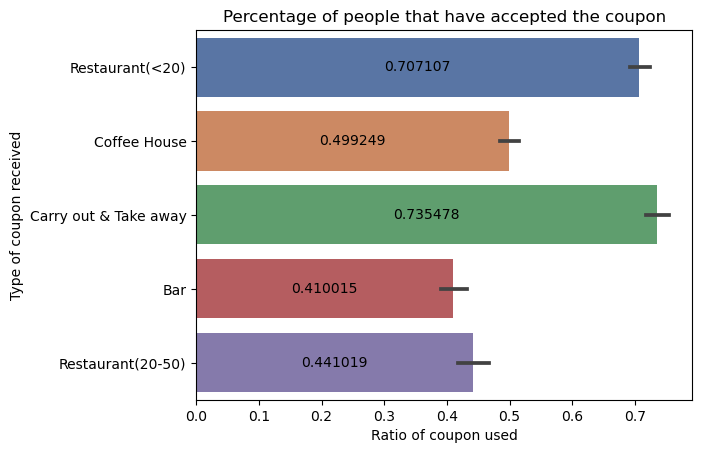

In [229]:
fig2 = sns.barplot(data, x = 'Y', y = 'coupon')
fig2.set_title('Percentage of people that have accepted the coupon')
fig2.set_xlabel('Ratio of coupon used')
fig2.set_ylabel('Type of coupon received')
plt.bar_label(plt.gca().containers[0], label_type = 'center')
plt.savefig('images/coupon_ratio.png')

6. Use a histogram to visualize the temperature column.

ValueError: output array is read-only

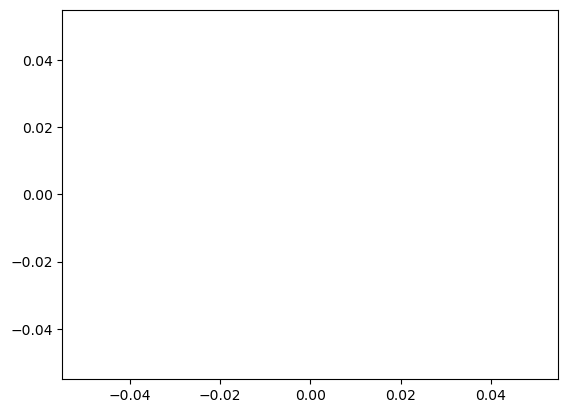

In [230]:
fig3 = sns.histplot(data, x = 'temperature' )
fig3.set_title('Histogram of temperatures throughout the evaluation')
fig3.set_xlabel('Temperatures')
plt.savefig('images/temperatures.png')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [198]:
bar_df = data.query('coupon == "Bar"')
bar_df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?
41%

In [199]:
bar_cp_ratio = bar_df['Y'].sum() / bar_df.shape[0] *100
bar_cp_ratio

41.00148735746158

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [200]:
list1 = ['never', 'less1', '1~3']
list2 = ['4~8', 'gt8']

fewer = bar_df.query('Bar in @list1')['Y'].sum() / bar_df.query('Bar in @list1')['Y'].shape[0]
print(fewer)
greater = bar_df.query('Bar in @list2')['Y'].sum() / bar_df.query('Bar in @list2')['Y'].shape[0]
print(greater)

0.37073707370737075
0.7688442211055276


The ratio of people accepting the coupon is much higher (76.9%) for people that go to the bar 4 times or more
a month versus the ratio (37.1%) for people that go to the bar 3 or fewer times a month.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


Let's first change the strings in the age column to numeric and replace the 50plus by 51 and below21 by 20

In [201]:
bar_df['age'].value_counts()

age
21         417
26         395
31         339
50plus     283
36         209
41         178
46         109
below21     87
Name: count, dtype: int64

In [205]:
pd.options.mode.copy_on_write = True
bar_df['age'] = bar_df['age'].str.replace("50plus", "51")
bar_df['age'] = bar_df['age'].str.replace("below21", "20")

bar_df['age'] = pd.to_numeric(bar_df['age'])
bar_df.info()

AttributeError: Can only use .str accessor with string values!

In [203]:
list3 = ['1~3', '4~8', 'gt8']
list4 = ['never', 'less1']

age_25 = bar_df.query('Bar in @list3 & age > 25')['Y'].sum() / bar_df.query('Bar in @list3 & age > 25')['Y'].shape[0]
others = bar_df.query('Bar in @list4 | age <= 25')['Y'].sum() / bar_df.query('Bar in @list4 | age <= 25')['Y'].shape[0]

print(age_25)
print(others)

0.6952380952380952
0.33500313087038197


The people over 25 and that go to a bar more than once a month accept the coupon (69.5%) at a much higher rate than
the others (33.5%)

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [204]:
bar_df['occupation'].value_counts()

occupation
Unemployed                                   301
Student                                      251
Computer & Mathematical                      232
Sales & Related                              178
Education&Training&Library                   140
Management                                   119
Office & Administrative Support              105
Arts Design Entertainment Sports & Media     100
Business & Financial                          89
Retired                                       75
Food Preparation & Serving Related            48
Community & Social Services                   44
Healthcare Support                            44
Healthcare Practitioners & Technical          41
Transportation & Material Moving              35
Legal                                         34
Architecture & Engineering                    27
Personal Care & Service                       27
Protective Service                            27
Construction & Extraction                     24
Life Phys

In [154]:
bar_no_kid = bar_df.query('Bar in @list3 & passanger != "Kid(s)" & occupation != "Farming Fishing & Forestry"')['Y'].sum() / bar_df.query('Bar in @list3 & passanger != "Kid(s)" & occupation != "Farming Fishing & Forestry"')['Y'].shape[0]
bar_no_kid

0.7132486388384754

The acceptance rate is now 71.3%

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [155]:
bar_df['maritalStatus'].value_counts()

maritalStatus
Married partner      882
Single               661
Unmarried partner    378
Divorced              75
Widowed               21
Name: count, dtype: int64

In [156]:
list5 = ['Less than $12500', '$12500 - $24999',' $25000 - $37499', '$37500 - $49999']
bar_no_wid = bar_df.query('((Bar in @list3 & passanger != "Kid(s)" & maritalStatus != "Widowed") | (Bar in @list3 & age < 30) | (RestaurantLessThan20 in @list2 & income in @list5))')['Y'].sum() / bar_df.query('((Bar in @list3 & passanger != "Kid(s)" & maritalStatus != "Widowed") | (Bar in @list3 & age < 30) | (RestaurantLessThan20 in @list2 & income in @list5))')['Y'].shape[0]
bar_no_wid

0.6159122085048011

The acceptance rate is now 61.6%

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In these observations above, the main factors influencing if the customer will accept the coupon seems to be related
to the fact that they don't have kids, are over 25 and already go to bars more than 4 times a month.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [157]:
results = data[['coupon','Y']].value_counts()
results.reset_index()
print(results.sort_values())

coupon                 Y
Carry out & Take away  0     633
Restaurant(20-50)      1     658
Restaurant(<20)        0     816
Bar                    1     827
Restaurant(20-50)      0     834
Bar                    0    1190
Carry out & Take away  1    1760
Restaurant(<20)        1    1970
Coffee House           1    1995
                       0    2001
Name: count, dtype: int64


So based on the counts of each coupon (above), it seems like the Restaurant 20 or the Carry out have the 
highest ratios of acceptance, so let's calculate the exact ratio

In [158]:
rest20 = data.query('coupon == "Restaurant(<20)"')['Y'].sum() / data.query('coupon == "Restaurant(<20)"')['Y'].shape[0]
print(rest20)
carry = data.query('coupon == "Carry out & Take away"')['Y'].sum() / data.query('coupon == "Carry out & Take away"')['Y'].shape[0]
print(carry)

0.7071069633883704
0.7354784788967823


Ok - so it looks like the carry out and take away coupon has the highest acceptance rate, let's investigate that one
and create a new dataframe that focus on this sub category only

In [159]:
carry_df = data.query('coupon == "Carry out & Take away"')
carry_df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
19,Work,Alone,Sunny,80,7AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12665,No Urgent Place,Friend(s),Sunny,30,10AM,Carry out & Take away,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12672,Home,Alone,Sunny,80,6PM,Carry out & Take away,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,1,0,0
12673,Home,Alone,Sunny,30,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,0
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1


Let's start looking at a few of the parameters if we see patterns, destination first

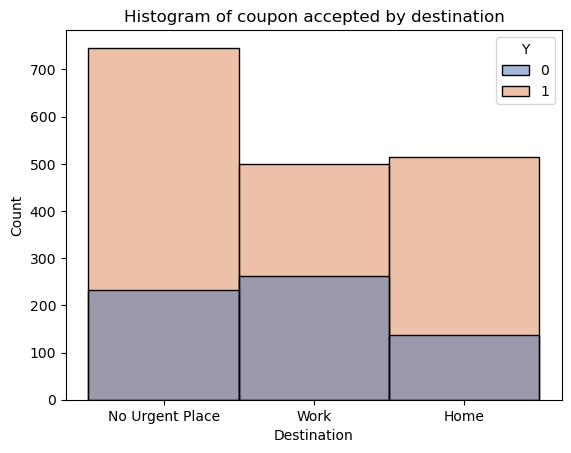

In [160]:
fig4 = sns.histplot(carry_df, x = 'destination', hue = 'Y')
fig4.set_title('Histogram of coupon accepted by destination')
fig4.set_xlabel('Destination')
plt.savefig('images/destination.png')

In [161]:
ratio_no = carry_df.query('destination == "No Urgent Place"')['Y'].sum() / carry_df.query('destination == "No Urgent Place"')['Y'].shape[0]
ratio_work = carry_df.query('destination == "Work"')['Y'].sum() / carry_df.query('destination == "Work"')['Y'].shape[0]
ratio_home = carry_df.query('destination == "Home"')['Y'].sum() / carry_df.query('destination == "Home"')['Y'].shape[0]
print(ratio_no)
print(ratio_work)
print(ratio_home)
ratio_notwork = carry_df.query('destination != "Work"')['Y'].sum() / carry_df.query('destination != "Work"')['Y'].shape[0]
print(ratio_notwork)

0.7627811860940695
0.6548556430446194
0.7886676875957122
0.7731453096259964


So it looks like the work destination has a much lower average than the overall group that we calculated before (73.5%) and the 2 others seem to have a higher acceptance rate than the average. So let's look at the other factors like passengers, time, temperature, gender, etc.

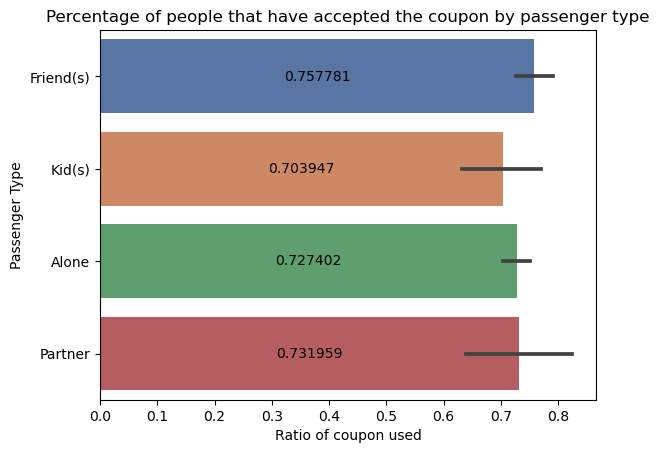

In [162]:
fig5 = sns.barplot(carry_df, y = 'passanger', x = 'Y')
fig5.set_title('Percentage of people that have accepted the coupon by passenger type')
fig5.set_xlabel('Ratio of coupon used')
fig5.set_ylabel('Passenger Type')
plt.bar_label(plt.gca().containers[0], label_type = 'center')
plt.savefig('images/pass_ratio.png')

In [163]:
ratio_friends = carry_df.query('passanger == "Friend(s)"')['Y'].sum() / carry_df.query('passanger == "Friend(s)"')['Y'].shape[0]
print(ratio_friends)

0.7577807848443843


So it looks like if people are with a friend, they have slightly higher change to accept the coupon.

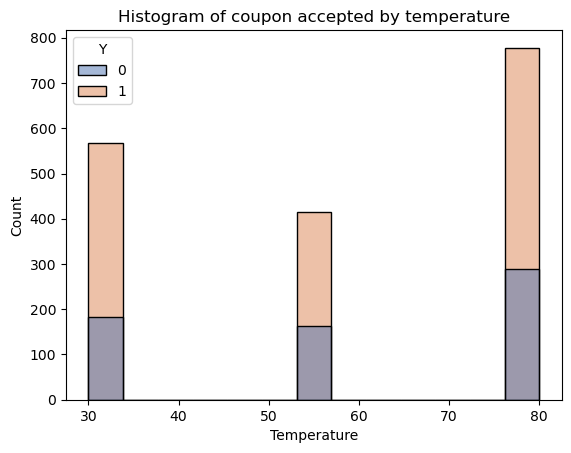

In [165]:
fig6 = sns.histplot(carry_df, x = 'temperature', hue = 'Y')
fig6.set_title('Histogram of coupon accepted by temperature')
fig6.set_xlabel('Temperature')
plt.savefig('images/temperature2.png')


In [166]:
ratio_temp = carry_df.query('temperature == 30')['Y'].sum() / carry_df.query('temperature == 30')['Y'].shape[0]
print(ratio_temp)

0.7563249001331558


This one was an interesting fact for me, at lower temperatures, it seems like people tend to accept the coupon
a little more often (higher than the average) than the others. It's not by  much though.

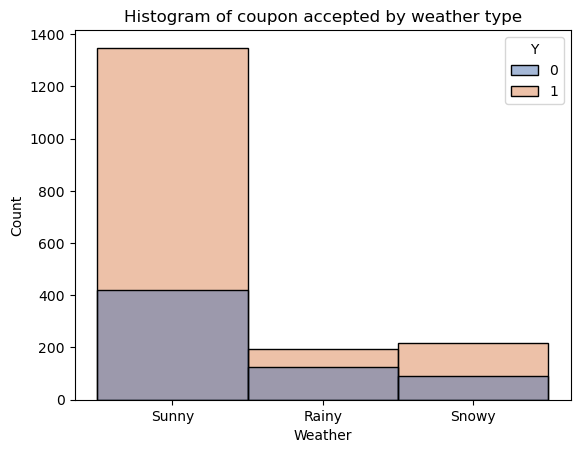

In [167]:
fig7 = sns.histplot(carry_df, x = 'weather', hue = 'Y')
fig7.set_title('Histogram of coupon accepted by weather type')
fig7.set_xlabel('Weather')
plt.savefig('images/weather.png')

In [168]:
ratio_weat = carry_df.query('weather == "Sunny"')['Y'].sum() / carry_df.query('weather == "Sunny"')['Y'].shape[0]
print(ratio_weat)

0.7628749292586304


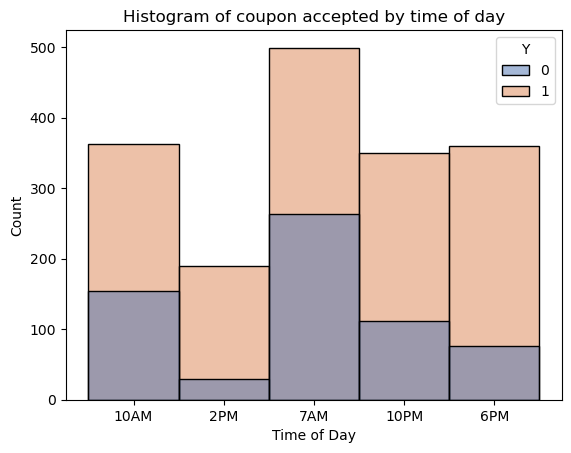

In [169]:
fig8 = sns.histplot(carry_df, x = 'time', hue = 'Y')
fig8.set_title('Histogram of coupon accepted by time of day')
fig8.set_xlabel('Time of Day')
plt.savefig('images/time.png')

In [170]:
ratio_time1 = carry_df.query('time == "2PM"')['Y'].sum() / carry_df.query('time == "2PM"')['Y'].shape[0]
print(ratio_time1)
ratio_time2 = carry_df.query('time == "6PM"')['Y'].sum() / carry_df.query('time == "6PM"')['Y'].shape[0]
print(ratio_time2)
ratio_time3 = carry_df.query('time == "6PM" or time == "2PM"')['Y'].sum() / carry_df.query('time == "6PM" or time == "2PM"')['Y'].shape[0]
print(ratio_time3)

0.8669724770642202
0.825287356321839
0.8392036753445635


Ha! The time of day seems to have a much bigger impact on the acceptance ratio. 2PM has an 86.7% acceptance rate
and 6PM has an 82.5% acceptance rate

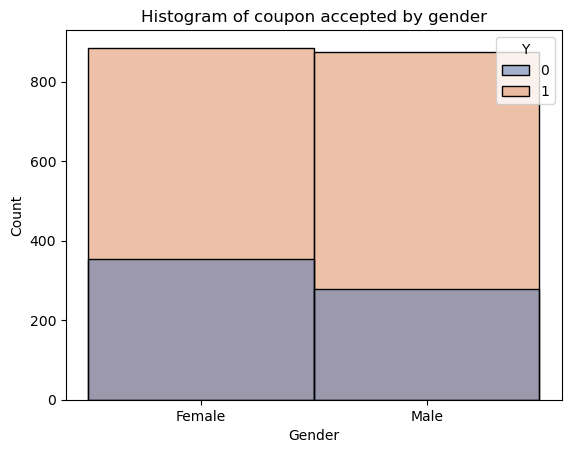

In [171]:
fig9 = sns.histplot(carry_df, x = 'gender', hue = 'Y')
fig9.set_title('Histogram of coupon accepted by gender')
fig9.set_xlabel('Gender')
plt.savefig('images/gender.png')

In [172]:
ratio_male= carry_df.query('gender == "Male"')['Y'].sum() / carry_df.query('gender == "Male"')['Y'].shape[0]
print(ratio_male)

0.7588898525585429


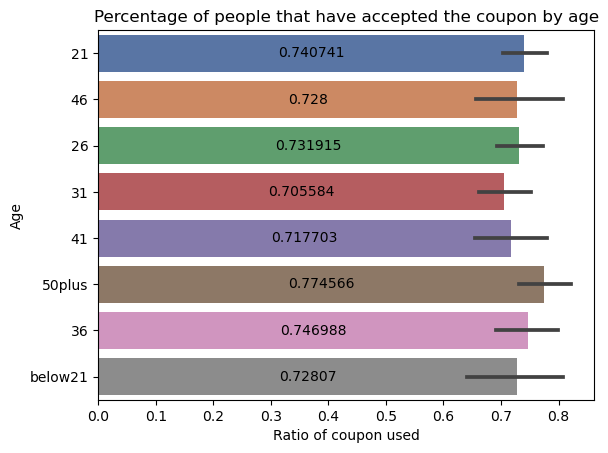

In [173]:
fig10 = sns.barplot(carry_df, y = 'age', x = 'Y')
fig10.set_title('Percentage of people that have accepted the coupon by age')
fig10.set_xlabel('Ratio of coupon used')
fig10.set_ylabel('Age')
plt.bar_label(plt.gca().containers[0], label_type = 'center')
plt.savefig('images/age_ratio.png')

50+ seems to have a much higher acceptance ratio.

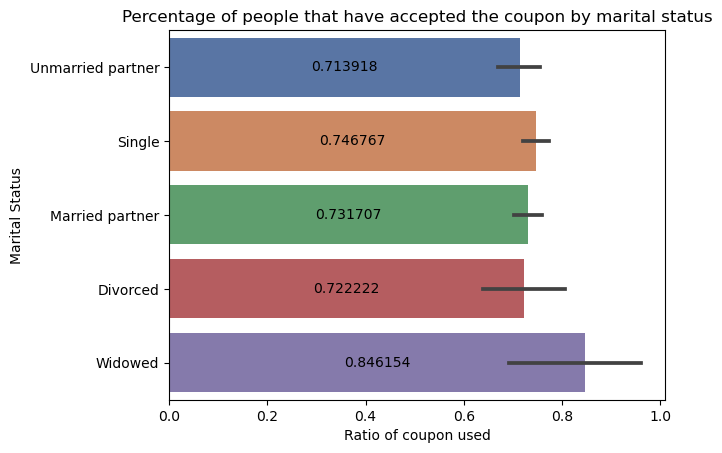

In [174]:
fig11 = sns.barplot(carry_df, y = 'maritalStatus', x = 'Y')
fig11.set_title('Percentage of people that have accepted the coupon by marital status')
fig11.set_xlabel('Ratio of coupon used')
fig11.set_ylabel('Marital Status')
plt.bar_label(plt.gca().containers[0], label_type = 'center')
plt.savefig('images/marital_ratio.png')

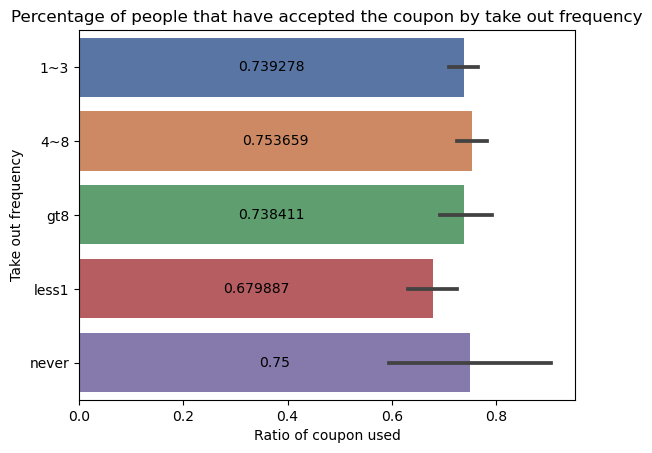

In [175]:
fig12 = sns.barplot(carry_df, y = 'CarryAway', x = 'Y')
fig12.set_title('Percentage of people that have accepted the coupon by take out frequency')
fig12.set_xlabel('Ratio of coupon used')
fig12.set_ylabel('Take out frequency')
plt.bar_label(plt.gca().containers[0], label_type = 'center')
plt.savefig('images/takeout_ratio.png')

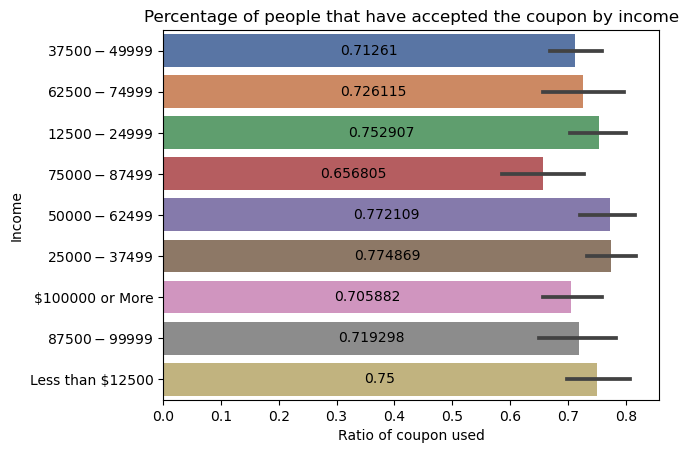

In [176]:
fig13 = sns.barplot(carry_df, y = 'income', x = 'Y')
fig13.set_title('Percentage of people that have accepted the coupon by income')
fig13.set_xlabel('Ratio of coupon used')
fig13.set_ylabel('Income')
plt.bar_label(plt.gca().containers[0], label_type = 'center')
plt.savefig('images/income_ratio.png')

So let's take the top 4 and put all this together...
2 or 6PM (83.9%), not going to work (77.3%), age is 50+ (77.4%) and widowed (84.6%)...

In [177]:
list_time = ['2PM', '6PM']
ratio_total = carry_df.query('time in @list_time & destination != "Work" & age == "50plus" & maritalStatus == "Widowed"')['Y'].sum() / carry_df.query('time in @list_time & destination != "Work" & age == "50plus"  & maritalStatus == "Widowed"')['Y'].shape[0]
sum1 = carry_df.query('time in @list_time & destination != "Work" & age == "50plus" & maritalStatus == "Widowed"')['Y'].sum()
print(ratio_total)
print(sum1)


1.0
11


So it looks like we have 100% hit rate, with this combination. I looked at the count and it's only 11 people so let's remove
widowed from the query as it makes it very restrictive (just to see).

In [178]:
ratio_total = carry_df.query('time in @list_time & destination != "Work" & age == "50plus"')['Y'].sum() / carry_df.query('time in @list_time & destination != "Work" & age == "50plus"')['Y'].shape[0]
sum1 = carry_df.query('time in @list_time & destination != "Work" & age == "50plus"')['Y'].sum()
print(ratio_total)
print(sum1)

0.8979591836734694
88


We still have a pretty good acceptance ratio of 89.8% with 88 people now part of this query.

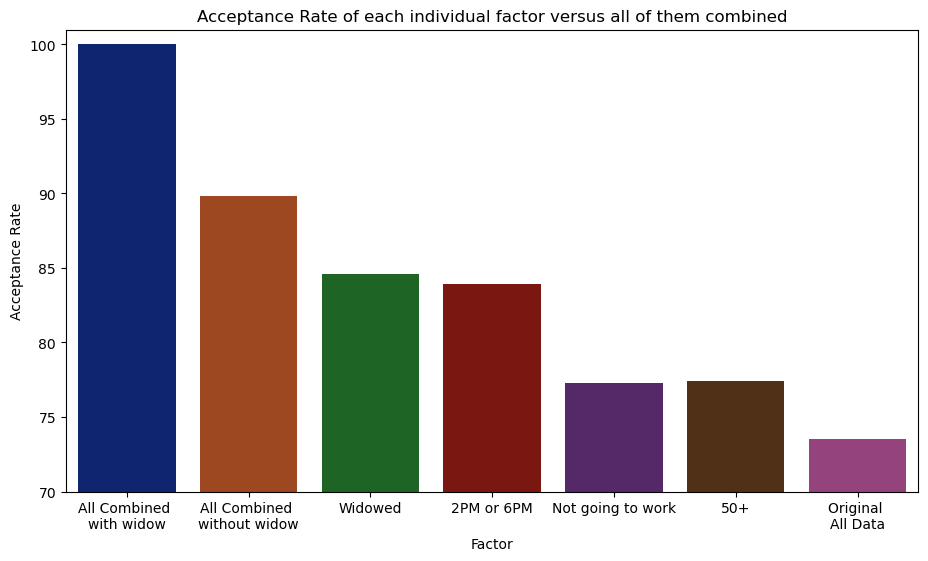

In [180]:
final_num = [["All Combined \nwith widow", 100], ["All Combined \nwithout widow", 89.8],["Widowed", 84.6], ["2PM or 6PM", 83.9], ["Not going to work", 77.3], ["50+", 77.4], ["Original \nAll Data", 73.5]]
final_df = pd.DataFrame(final_num, columns = ["Factor", "Acceptance Rate"])
plt.figure(figsize = [11,6])
plt.ylim(top = 101, bottom = 70)
plt.title("Acceptance Rate of each individual factor versus all of them combined")
sns.barplot(final_df, x = "Factor", y = "Acceptance Rate", palette = "dark")
plt.savefig('images/final_combined.png')

In conclusion, for the “carry away and take out” data, I found that the marital status (widowed) seems to be the biggest factor for accepting the coupon with an 84.6% acceptance rate. The 2PM (86.7%) and 6PM (82.5%) were next with the time-of-day factor with a combined rate of acceptance of 83.9%. 
Then the other factors were:
1-	Not going to work (77.3%)
2-	50+ (77.4%)
The final overall rate for a person 50+ of age, widowed, not on their way to work and receiving the coupon at 2PM or 6PM was a staggering 100% but with only 11 data points. If we remove the “widowed” component, we have 88 data points and an acceptance rate of 89.8% which is still high.
